In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
train = pd.read_csv("data/train.csv")
features = pd.read_csv("data/features.csv")
stores = pd.read_csv("data/stores.csv")

df = (
    train
    .merge(features, on=["Store", "Date", "IsHoliday"])
    .merge(stores, on="Store")
)

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Store", "Dept", "Date"])
df.head()

c:\Users\ddron\Documents\Latest resume\portfolio\Projects\P2-Retail_Forecasting_System\retail-forecasting-analytics-system\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [2]:
store = 1
dept = 1

ts = (
    df[(df["Store"] == store) & (df["Dept"] == dept)]
    [["Date", "Weekly_Sales"]]
    .rename(columns={"Date": "ds", "Weekly_Sales": "y"})
    .sort_values("ds")
)
ts.head()


,ds,y
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [3]:
model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode="additive"
)

model.fit(ts)


03:45:10 - cmdstanpy - INFO - Chain [1] start processing
03:45:11 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model.make_future_dataframe(periods=12, freq="W")
forecast = model.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
150,2012-12-16,24813.727250,38218.671946,53259.008946,24813.726877,24813.727628,21015.781431,21015.781431,21015.781431,293.227207,293.227207,293.227207,20722.554224,20722.554224,20722.554224,0.0,0.0,0.0,45829.508681
151,2012-12-23,24817.030699,35595.703909,50582.751474,24817.030242,24817.031164,18265.934366,18265.934366,18265.934366,293.227207,293.227207,293.227207,17972.707158,17972.707158,17972.707158,0.0,0.0,0.0,43082.965065
152,2012-12-30,24820.334148,24960.924719,39940.892187,24820.333607,24820.334704,8106.578360,8106.578360,8106.578360,293.227207,293.227207,293.227207,7813.351152,7813.351152,7813.351152,0.0,0.0,0.0,32926.912508
153,2013-01-06,24823.637597,13940.294549,29075.164415,24823.636941,24823.638253,-3248.123223,-3248.123223,-3248.123223,293.227207,293.227207,293.227207,-3541.350430,-3541.350430,-3541.350430,0.0,0.0,0.0,21575.514374
154,2013-01-13,24826.941046,6933.276419,22079.324445,24826.940267,24826.941777,-9947.329439,-9947.329439,-9947.329439,293.227207,293.227207,293.227207,-10240.556646,-10240.556646,-10240.556646,0.0,0.0,0.0,14879.611608


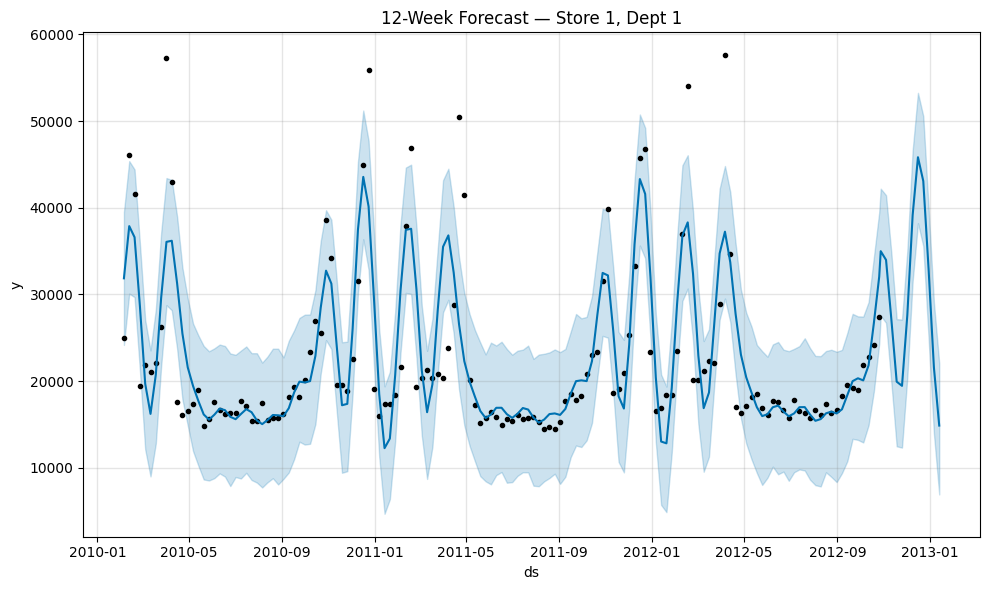

In [5]:
fig1 = model.plot(forecast)
plt.title(f"12-Week Forecast — Store {store}, Dept {dept}")
plt.tight_layout()
plt.savefig("images/forecast_store1_dept1.png")
plt.show()


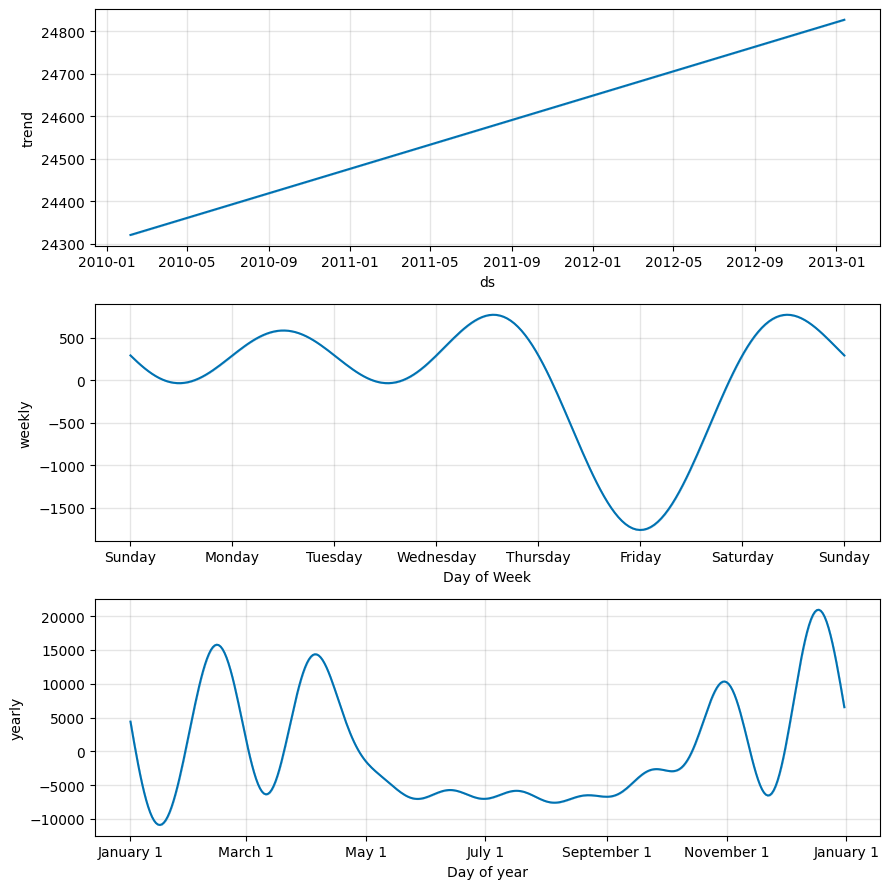

In [6]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.savefig("images/components_store1_dept1.png")
plt.show()


Insights
- Weekly seasonality is strong, consistent with cyclical shopping behavior in large-format retail.
- Holiday periods show visible uplift relative to baseline, highlighting the impact of seasonal events.
- This baseline forecast will be used as an interpretable benchmark against more complex global models (e.g., LightGBM) later in the system.